# Time Series EDA on accident data 

**Problem Statement:** Monitoring the rate of RTCs over time.

* Here we will be using accident dataset to understanding the Road Traffic Collision (RTC) with time and derrive some conclusions. 

* We will start with data description and cleaning, then we will visualize our data to understand better. These processes can be called EDA (Exploratory Data Analysis).

The dataste has 2047256 rows and 34 columns 

# 1. Exploring the data

Data is first collected from the source and loaded into the python platform.

## 1.1 Importing the required packages

In [1]:
import numpy as np # For mathematical operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.

plt.style.use('ggplot') # style of plots. ggplot is one of the most used style


## 1.2 Import the dataset and data cleaning

**Import data in pandas dataframe**

In [2]:
df = pd.read_parquet('/content/drive/MyDrive/Omdena dataset/accident_data_time_series.parquet')
pd.set_option('display.max_columns', 50)
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,None,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


**Checking for the shape of the dataset**

In [3]:
df.shape

(2047256, 34)

**Cheching for the columns in the dataset**

In [4]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

### Observations:
1. Dataset has 2047256  rows 
2. Dataset has 34 columns
3. Columns name :''Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',       'Local_Authority_(District)',  'Local_Authority_(Highway)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
'LSOA_of_Accident_Location', 'Number_of_Casualties','Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',      'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions','Year', 'InScotland'

**Data Cleaning**

**Removing redundant column from dataframe.**

''Accident_Index', '1st_Road_Number',  '2nd_Road_Number',  'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude' are redundant column and wont be required in Time Series EDA / analysis

In [5]:
df.drop(columns = ['Accident_Index','LSOA_of_Accident_Location', 'Special_Conditions_at_Site','1st_Road_Number',  '2nd_Road_Number',  'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'], inplace = True)

Checking the dataypes of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 25 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   1st_Road_Class                               object 
 1   2nd_Road_Class                               object 
 2   Accident_Severity                            object 
 3   Carriageway_Hazards                          object 
 4   Date                                         object 
 5   Day_of_Week                                  object 
 6   Did_Police_Officer_Attend_Scene_of_Accident  float64
 7   Junction_Control                             object 
 8   Junction_Detail                              object 
 9   Light_Conditions                             object 
 10  Local_Authority_(District)                   object 
 11  Local_Authority_(Highway)                    object 
 12  Number_of_Casualties                         int64  
 13  Number_of_Ve

### Observation: 
1. Date column is object type and it should be of date timetype column.
2. Did_Police_Officer_Attend_Scene_of_Accident  is float type and need to be object type.
3. Time coulum is object type and need to be changed in time format. 
4. Speed_limit should be an object type instead of integer type. 


Working on date columns

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Working on time column

In [8]:
df['Time'] = pd.to_datetime(df['Time']).dt.time


Working on speed limit column 

In [9]:
df['Speed_limit'] = df['Speed_limit'].apply(lambda x: str(x))

Working on Number_of_casulaity

In [10]:
# df['Number_of_Casualties'] = df['Number_of_Casualties'].apply(lambda x: x if x < 5 else 'High Casuality').replace(1, 'One').replace(2, 'Two').replace(3, 'Three').replace(4, 'Four')

**Checking for duplicate values**

Check for duplicate values and if present then drop the same.

In [11]:
index = df[df.duplicated()].index


In [12]:
df.drop(index, inplace = True)


**Summary of Dataset**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Did_Police_Officer_Attend_Scene_of_Accident,2046794.0,1.202324,0.408198,1.0,1.0,1.0,1.0,3.0
Number_of_Casualties,2047072.0,1.345863,0.817984,1.0,1.0,1.0,1.0,93.0
Number_of_Vehicles,2047072.0,1.833553,0.715059,1.0,1.0,2.0,2.0,67.0
Pedestrian_Crossing-Human_Control,2044152.0,0.010418,0.135119,0.0,0.0,0.0,0.0,2.0
Pedestrian_Crossing-Physical_Facilities,2043512.0,0.751849,1.835338,0.0,0.0,0.0,0.0,8.0
Year,2047072.0,2010.523768,3.765612,2005.0,2007.0,2010.0,2014.0,2017.0


**Checking for unique values and missing values in categorical columns**

In [14]:
categorical_column = [cols for cols in df.columns if df[cols].dtype == 'O']
numerical_column = [cols for cols in df.columns if df[cols].dtype != 'O']

for col in categorical_column:
    print('------' * 10)
    print('Number of Unique values')
    print(col, df[col].nunique())
    print('Unique values')
    if df[col].nunique() > 10:
        print(col, df[col].unique()[0:10])
    else:
        print(df[col].value_counts(ascending = False)/len(df)*100)
        print('Percentage of null values')
        print(df[col].isna().sum() / len(df)* 100)
    print('Null values')
    print(col, df[col].isna().sum())

------------------------------------------------------------
Number of Unique values
1st_Road_Class 6
Unique values
A               45.266410
Unclassified    29.500477
B               12.606103
C                8.545620
Motorway         3.813398
A(M)             0.267993
Name: 1st_Road_Class, dtype: float64
Percentage of null values
0.0
Null values
1st_Road_Class 0
------------------------------------------------------------
Number of Unique values
2nd_Road_Class 6
Unique values
Unclassified    39.810129
A                9.834095
C                4.497741
B                3.891265
Motorway         0.655961
A(M)             0.074497
Name: 2nd_Road_Class, dtype: float64
Percentage of null values
41.236312157071175
Null values
2nd_Road_Class 844137
------------------------------------------------------------
Number of Unique values
Accident_Severity 3
Unique values
Slight     84.724963
Serious    13.987002
Fatal       1.288035
Name: Accident_Severity, dtype: float64
Percentage of null val

Observation:
1. Data missing out of range is same as nan, so replacing the same
2. Speed limit column has 'nan' and '0.0' entries. Replacing the same with nan.
3. In Light_Conditions column 'Darkness - no lighting', 'Darkness - lights unlit' are the same  with different entries. 
4. In 'Road_type' column, Unknown enrty is similar to nan values. 
5. In Weather_Conditions columns, Unknown  is similar to nan values. 
6. Dropping 2nd_class_road column as it has more than 40 % of missing values.  

Putting nan values in place of "Data missing out of range"

In [15]:
df = df.replace('Data missing or out of range', np.nan).replace('nan', np.nan).replace('0.0', np.nan)


Cleaning Light_condition columns

In [16]:
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness - no lighting', 'Darkness - lights unlit' )
df['Light_Conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', nan], dtype=object)

Cleaning road type column

In [17]:
df['Road_Type'] = df['Road_Type'].replace('Unknown', np.nan )
df['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', nan], dtype=object)

Cleaning Weather_Conditions columns

In [18]:
df['Weather_Conditions'] = df['Weather_Conditions'].replace('Unknown', np.nan)
df['Weather_Conditions'].unique()

array(['Raining no high winds', 'Fine no high winds', nan,
       'Snowing no high winds', 'Other', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

Dropping 2nd_class_road column

In [19]:
df.drop(columns = ['2nd_Road_Class'], inplace = True)

Data Cleaning has been completed 

<<<<<<<<<<<<<<<<<<<<<<<<<<<


# 2. Data Visualization 

Dividing the data set on the basis of Scotland

In [20]:

df_scotland = df[df['InScotland'] == 'Yes']
df_not_scotland = df[df['InScotland'] == 'No']

## 2.1 Analysis for accident severity with date, year, month, quarter

In [31]:
# analysing the count of accident sevearity date wise
df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Date']].groupby(by = 'Date').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Date']].groupby(by = 'Date').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Date']].groupby(by = 'Date').count()

figure, axes = plt.subplots(3, figsize=( 100, 25))
plt.grid('both')

sns.lineplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.lineplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.lineplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')

axes[0].set_title('Fatal Accident with time',fontsize= 40)
axes[1].set_title('Serious Accident with time',fontsize=40)
axes[2].set_title('Slight Accident with time', fontsize= 40)

In [36]:
# Calculating days where most fatal accicent caused
dates_fatal = df_fatal.sort_values('Accident_Severity', ascending = False).head(10).index
df

DatetimeIndex(['2006-12-21', '2005-09-17', '2007-01-27', '2005-12-15',
               '2006-12-16', '2005-11-25', '2005-12-10', '2006-09-23',
               '2005-06-18', '2006-06-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

Observation:
1. With time Slight and fatal Accident count has been decreased.
2. It seems there is no change in Serious accident cases

Text(0.5, 1.0, 'Slight Accident with time')

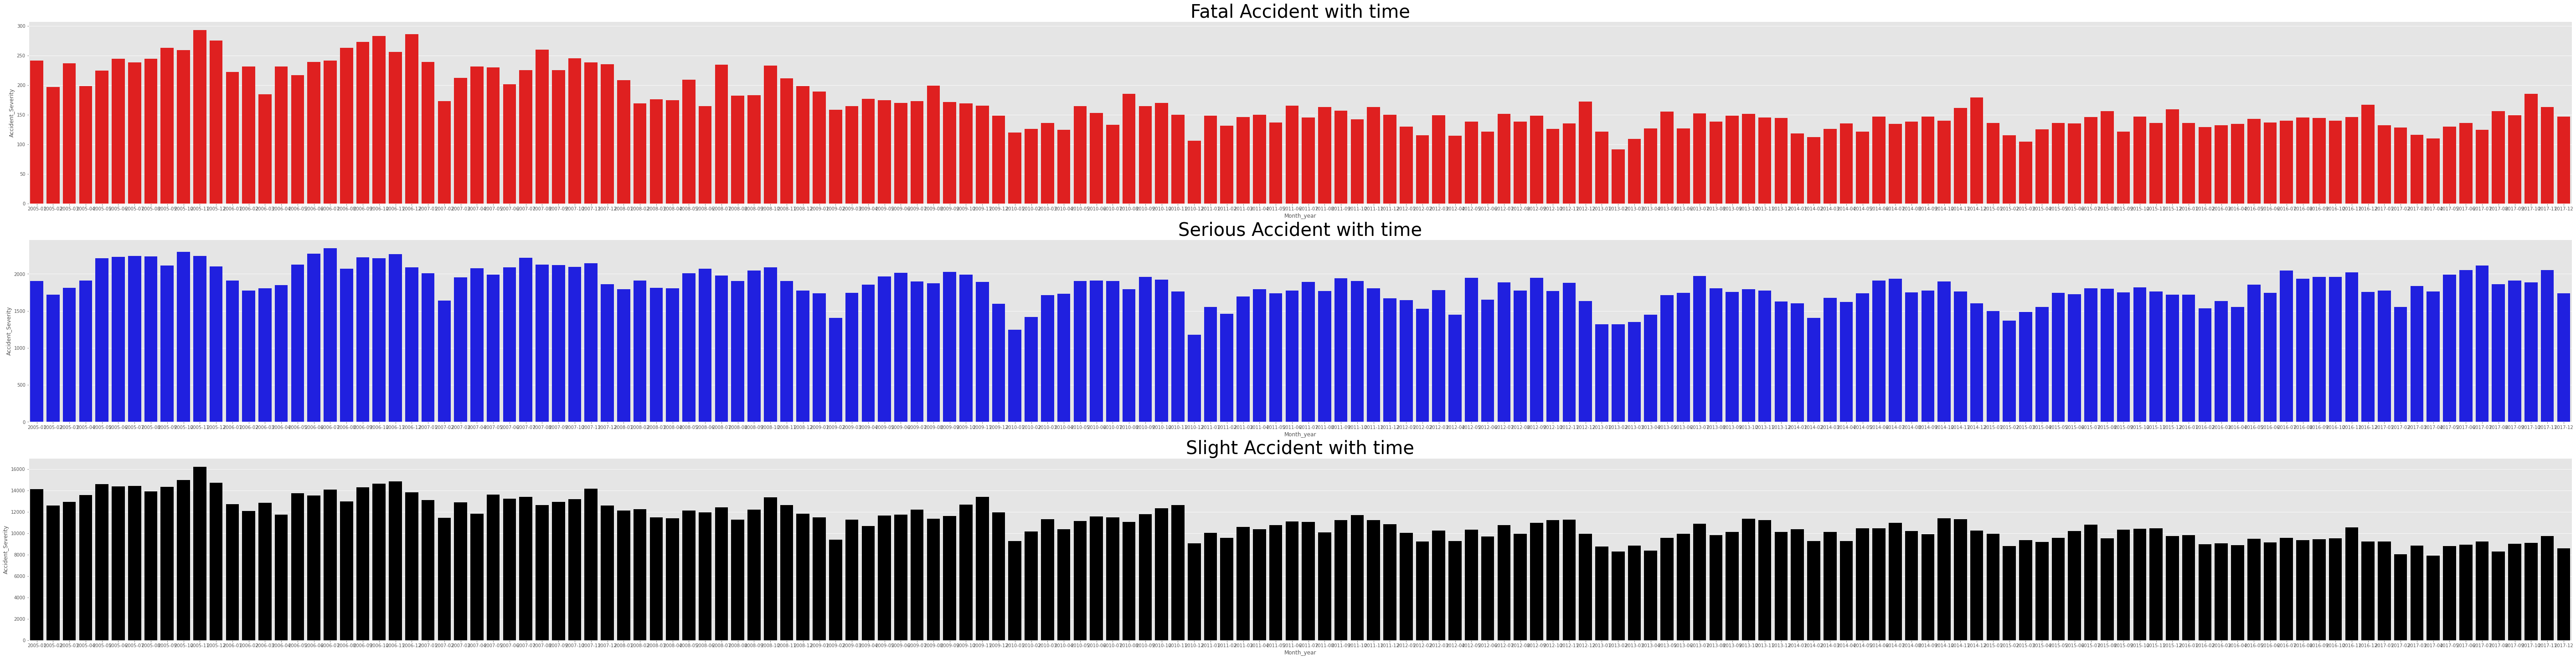

In [23]:
# analysing the count of accident sevearity Month wise
df['Month_year'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Month_year']].groupby(by = 'Month_year').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Month_year']].groupby(by = 'Month_year').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Month_year']].groupby(by = 'Month_year').count()


figure, axes = plt.subplots(3, figsize=( 100, 25))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',fontsize= 40)
axes[1].set_title('Serious Accident with time',fontsize=40)
axes[2].set_title('Slight Accident with time', fontsize= 40)

Observations: 
1. It seems that  October, November December and January has more accidents as compared to other months. 

Text(0.5, 1.0, 'Slight Accident with time')

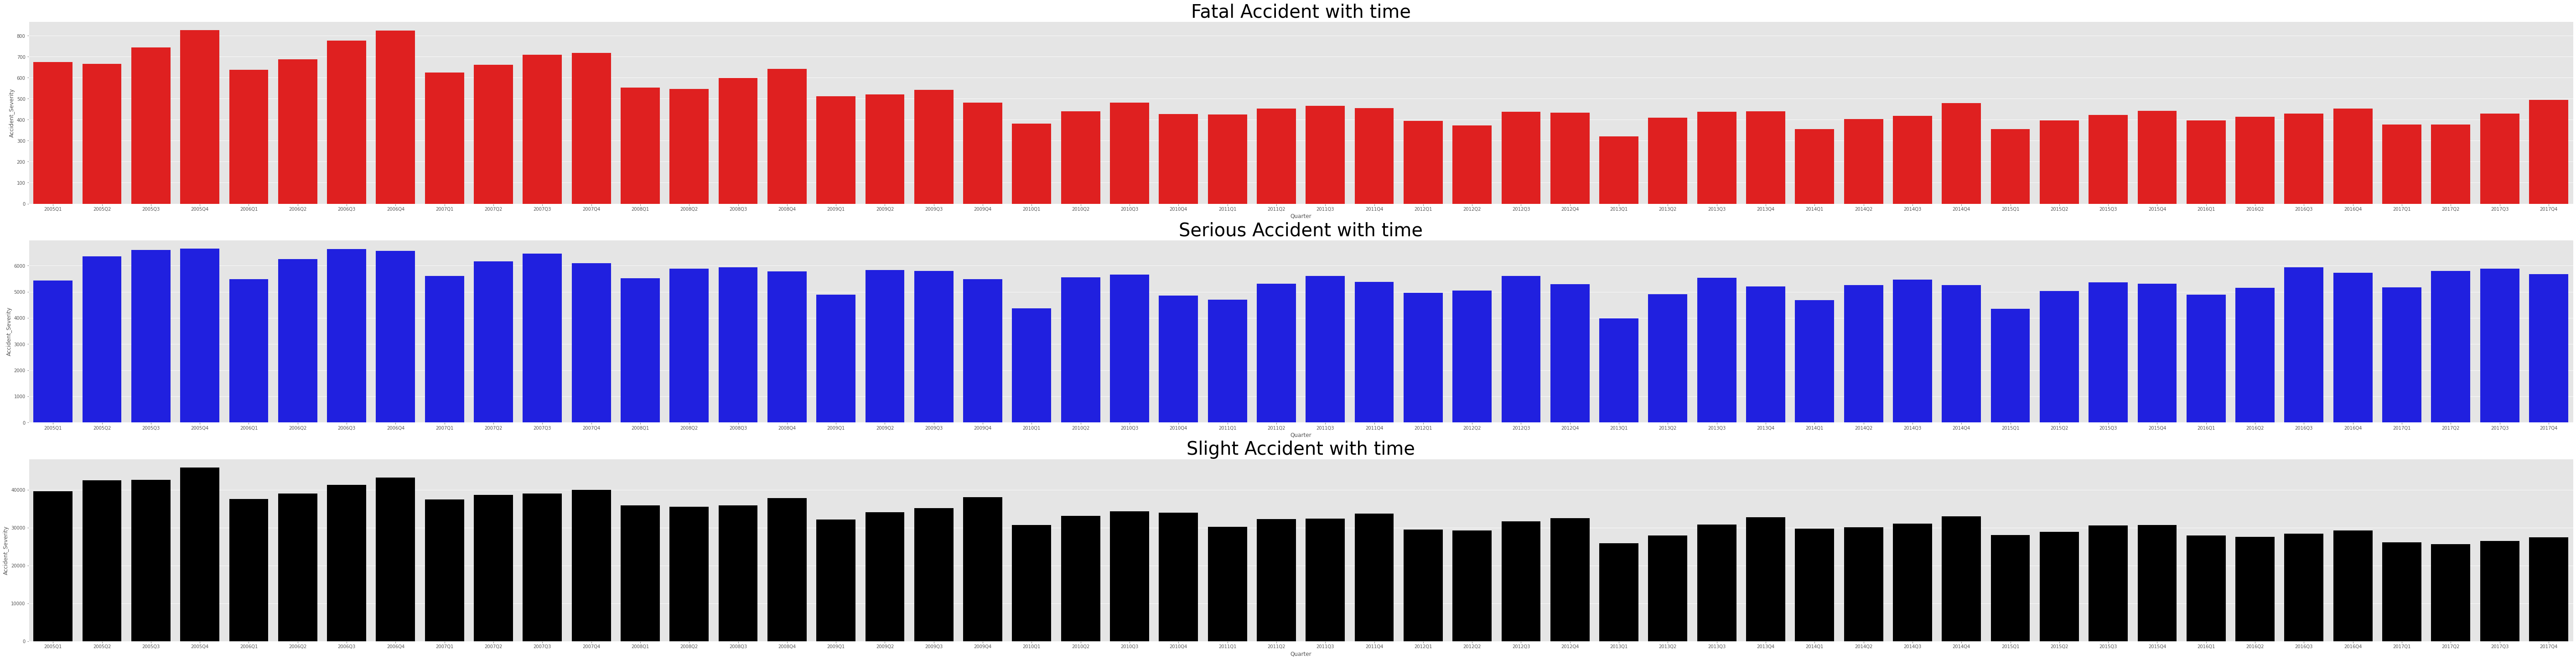

In [24]:
# analysing the count of accident sevearity quarter wise
df['Quarter'] = df['Date'].dt.to_period('Q')

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()


figure, axes = plt.subplots(3, figsize=( 100, 25))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',fontsize= 40)
axes[1].set_title('Serious Accident with time',fontsize=40)
axes[2].set_title('Slight Accident with time', fontsize= 40)


Observations:
1. Quarter Q4 has high accident counts in a year.

Text(0.5, 1.0, 'Slight Accident with time')

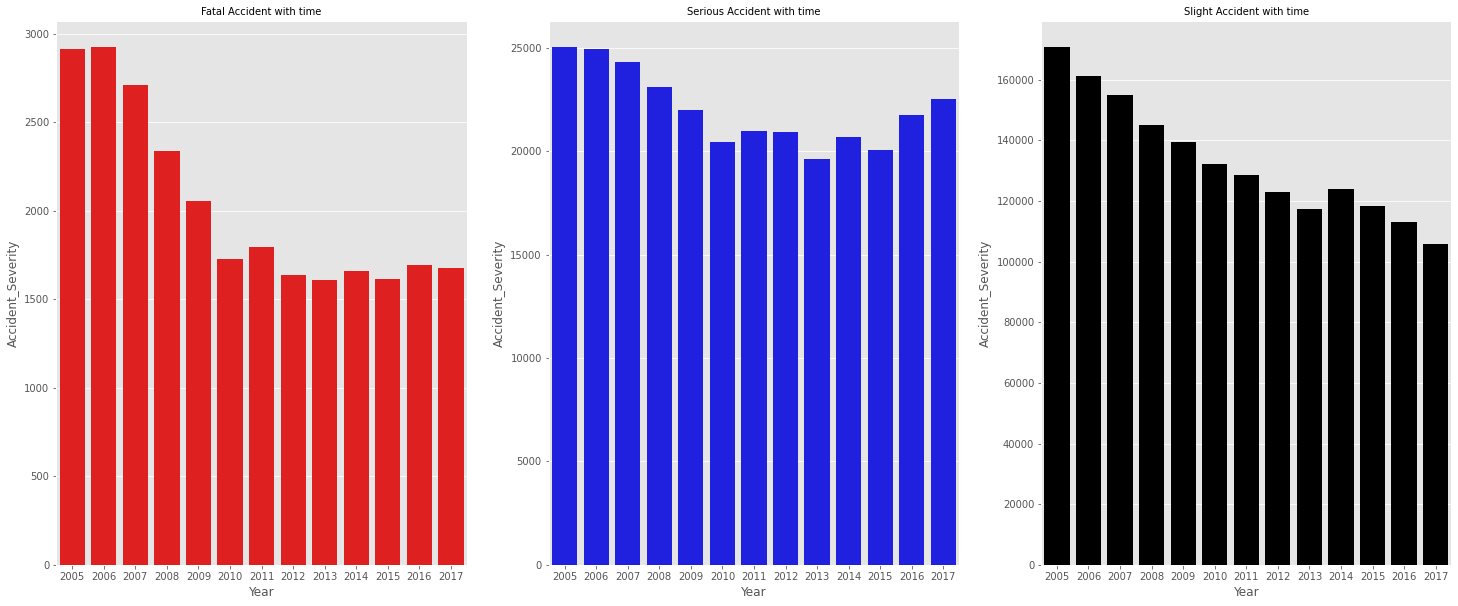

In [25]:
# analysing the count of accident sevearity Year wise

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Year']].groupby(by = 'Year').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Year']].groupby(by = 'Year').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Year']].groupby(by = 'Year').count()

figure, axes = plt.subplots(1,3, figsize=( 25, 10))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',  fontsize= 10)
axes[1].set_title('Serious Accident with time',  fontsize=10)
axes[2].set_title('Slight Accident with time', fontsize= 10)


# ax = sns.countplot(data = df, hue ='Accident_Severity' , x = 'Year' )
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height() }', (p.get_x(), p.get_height()), ha='left', va='top', color='black', size=18)
# plt.legend(loc = 'best' , fontsize = 50, shadow = True, facecolor = 'lightpink' )
# plt.xticks(fontsize = 50)
# plt.yticks(fontsize = 50)
# plt.title('Year wise accident from 2005 to 2018', fontsize = 50)

# plt.show(block = False)

Observation : 
1. From 2005 to 2017 Slight accident cases are drastically reduced 
2. Slight  changes in Fatal and serious accidents

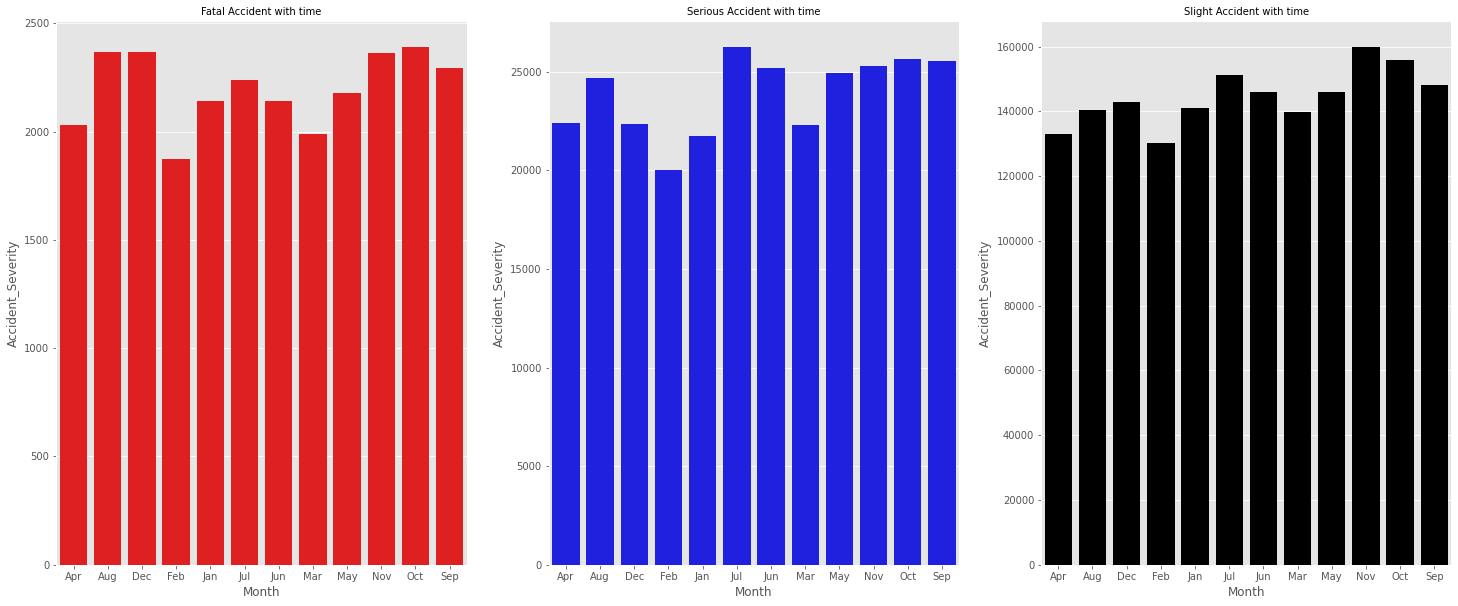

In [26]:
# analysing the total count of accident in each month

df['Month'] = pd.to_datetime(df['Date'], format='%m').dt.month_name().str.slice(stop=3)

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Month']].groupby(by = 'Month').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Month']].groupby(by = 'Month').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Month']].groupby(by = 'Month').count()

figure, axes = plt.subplots(1,3, figsize=( 25, 10))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',  fontsize= 10)
axes[1].set_title('Serious Accident with time',  fontsize=10)
axes[2].set_title('Slight Accident with time', fontsize= 10)



# ax = sns.countplot(data = df, hue ='Accident_Severity' , x = 'Month' )
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height() }', (p.get_x(), p.get_height()), ha='left', va='top', color='black', size=18)
# plt.legend(loc = 'best' , fontsize = 30, shadow = True, facecolor = 'lightpink' )
# plt.xticks(fontsize = 50)
# plt.yticks(fontsize = 50)
# plt.title('Year wise accident in different months', fontsize = 50)

plt.show(block = False)

Conclusion :
1. It seems winter months  have more accidents

Text(0.5, 1.0, 'Slight Accident with time')

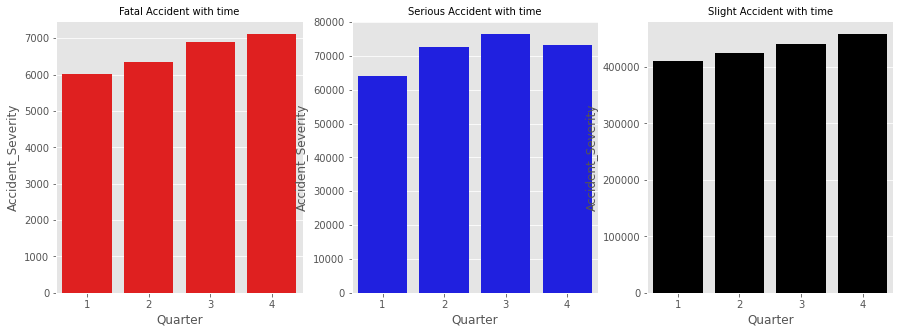

In [27]:
# analysing the total count of accident in each Quarter
df['Quarter'] = df['Date'].dt.quarter

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()

figure, axes = plt.subplots(1,3, figsize=( 15, 5))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',  fontsize= 10)
axes[1].set_title('Serious Accident with time',  fontsize=10)
axes[2].set_title('Slight Accident with time', fontsize= 10)



Obseravtion:

1. It seems 4th Quarter has more accident chance

## 2.2 Analysis for accident severity with time.

In [28]:
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S')
df['Time'].dtypes
df['Hour'] = df['Time'].apply(lambda x : x.hour)


Text(0.5, 1.0, 'Slight Accident with time')

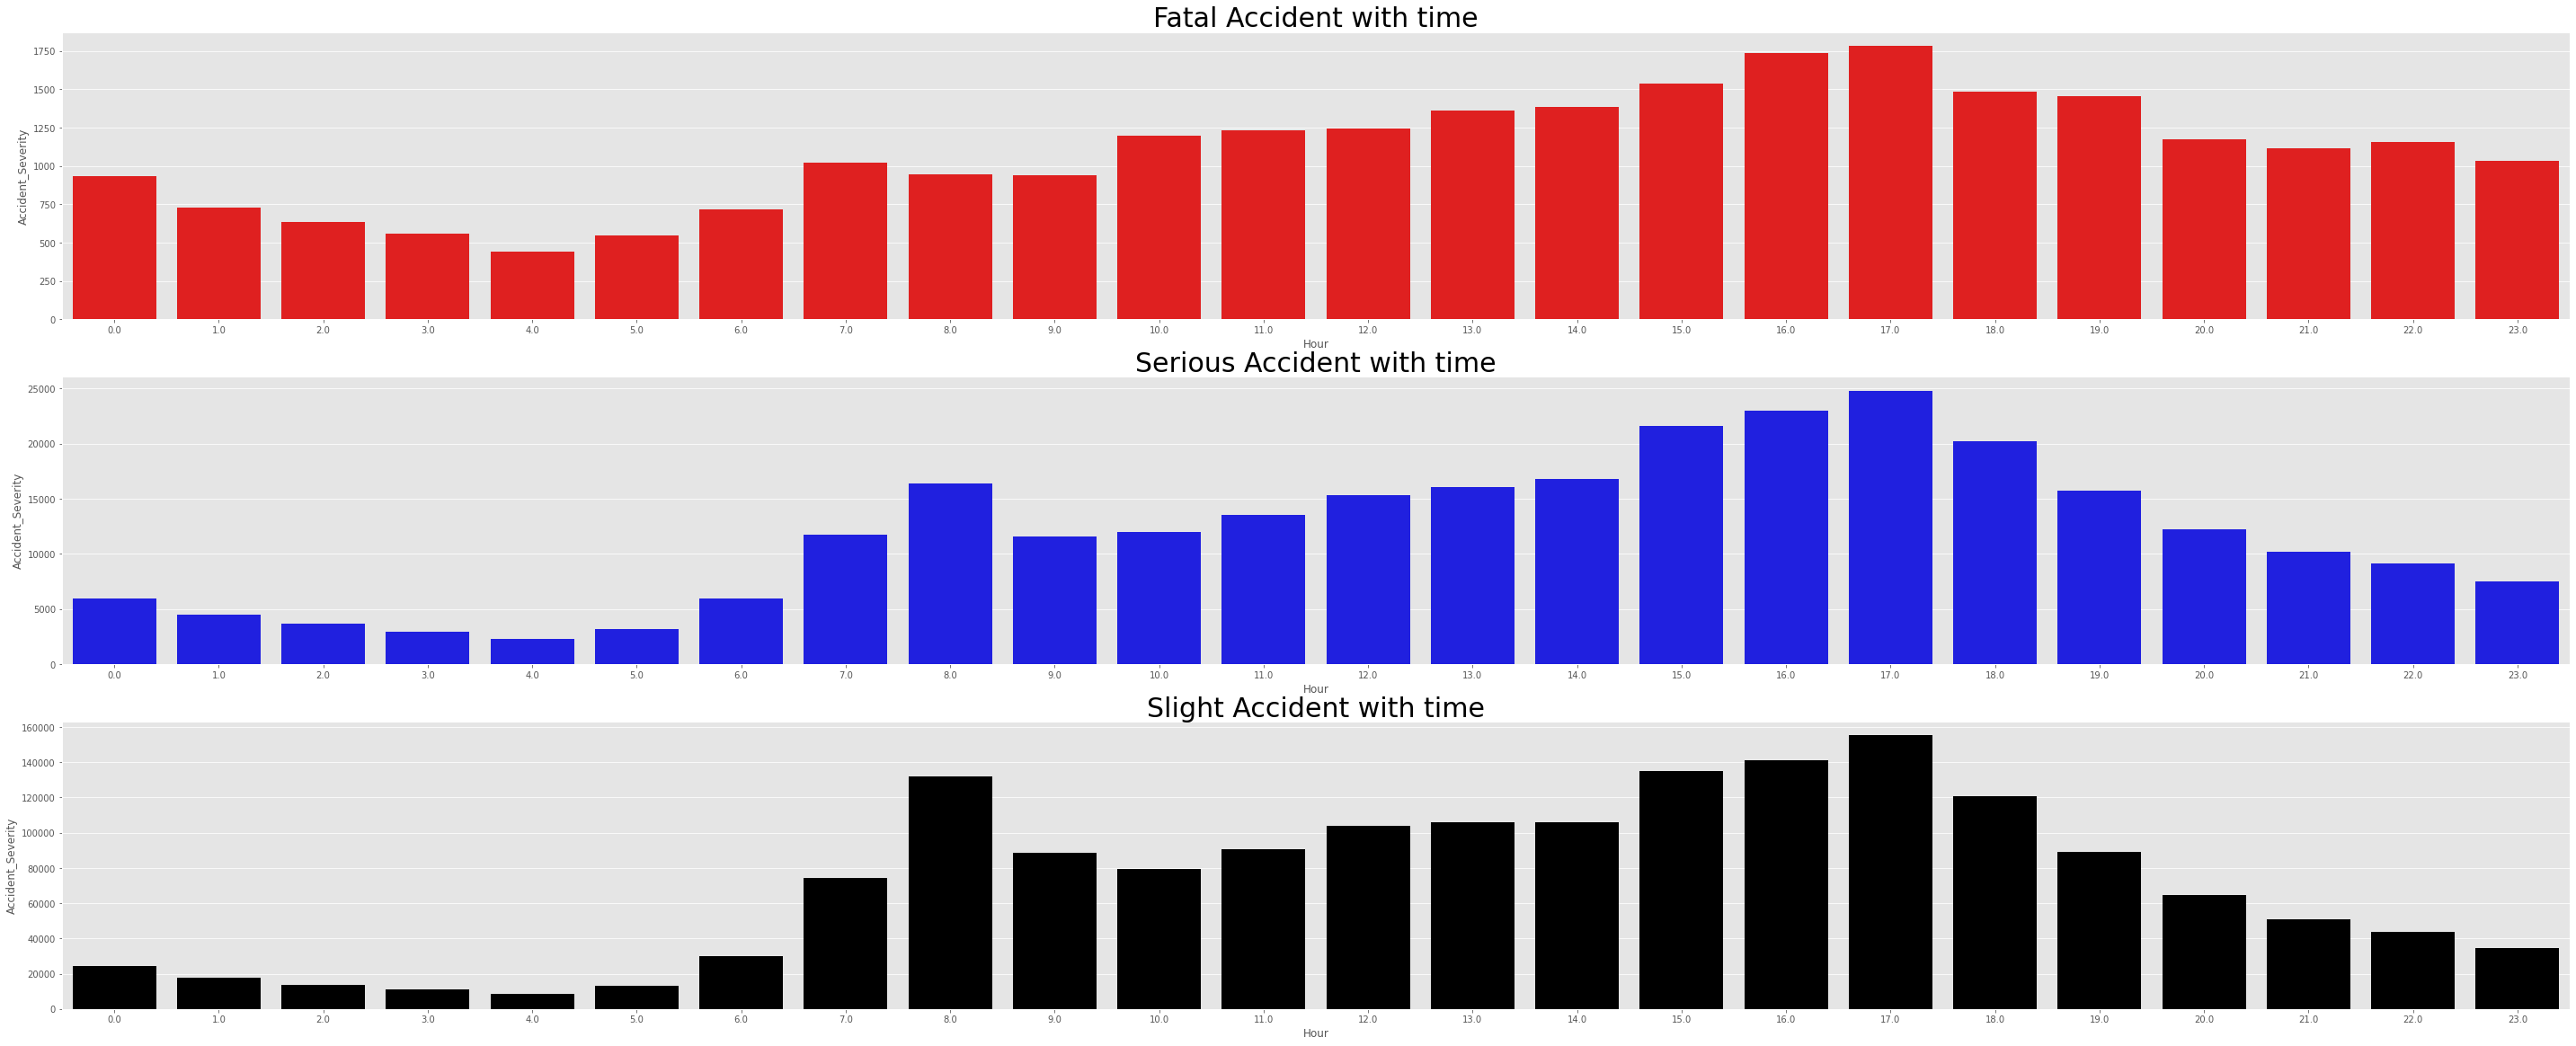

In [29]:
# analysing the count of accident sevearity quarter wise

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Hour']].groupby(by = 'Hour').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Hour']].groupby(by = 'Hour').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Hour']].groupby(by = 'Hour').count()

figure, axes = plt.subplots(3, figsize=(50, 20))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')

axes[0].set_title('Fatal Accident with time',  fontsize= 30)
axes[1].set_title('Serious Accident with time',  fontsize= 30)
axes[2].set_title('Slight Accident with time', fontsize= 30)






Observation:
1. Probablity of accident in morning 7:00Am to 8:00PM is very high as compared to 